# Test truncation

In [1]:
import audio_editor
import os
import numpy as np
from matplotlib import pyplot as plt
from glob import glob

In [7]:
import IPython.display

In [2]:
wav_files = glob('../sample_audio/*.wav')

In [3]:
wav_files

['../sample_audio/farend_Diaz1.wav',
 '../sample_audio/nearend_Clooney5.wav',
 '../sample_audio/farend_Sparks4.wav']

../sample_audio/farend_Diaz1.wav


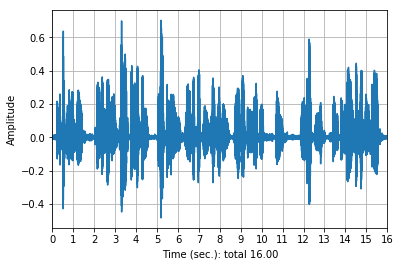

../sample_audio/nearend_Clooney5.wav


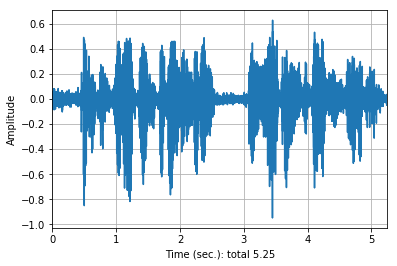

../sample_audio/farend_Sparks4.wav


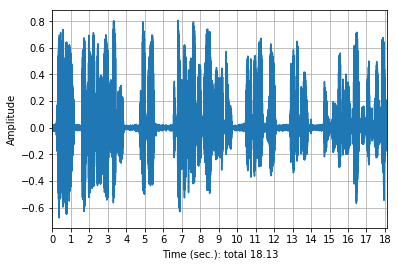

In [4]:
def plot_wav(wav_data, freq):
    assert len(wav_data.shape) == 1
    plt.figure(0, figsize=(6, 4))
    plt.plot(wav_data)
    plt.grid()
    
    interval = 10
    length_sec = int(len(wav_data)/freq) + 1
    interval = min(10, length_sec)
    ind_1 = np.arange(0, length_sec+1, int(length_sec/interval))
    ind_2 = ind_1 * freq
    plt.xticks(ind_2, ind_1)
    plt.xlim([0, len(wav_data)])
    plt.xlabel("Time (sec.): total %0.2f" % (len(wav_data)/freq))
    plt.ylabel("Amplitude")

#     plt.savefig("./figure/fig11a.eps", bbox_inches="tight")
#     plt.savefig("./figure/fig11a.png", bbox_inches="tight")
    plt.show()

def show_sinal(_file):
    signal, freq = audio_editor.load_audio(_file, file_format='wav')
    plot_wav(signal, freq)

for _f in wav_files:
    print(_f)
    show_sinal(_f)

## Try!!

In [5]:
import numpy as np


def amplitude_filter(audio_signal,
                     min_amplitude: float,
                     min_interval: int):
    """ Amplitude-based truncation. In given audio signal, where every sampling point has amplitude
    less than `min_amplitude` and the length is greater than `min_interval`, will be removed.


     Parameter
    ---------------
    audio_signal: ndarray
        audio signal, which is 1-dim numpy array
    min_amplitude: float
        minimum amplitude to cutoff
    min_interval: int
        minimum interval (in terms of sampling point) of cutoff

     Return
    ---------------
    audio_signal_masked: ndarray
        modified audio signal
    """

    assert min_amplitude > 0
    assert min_interval > 0

    audio_signal_mask = (np.abs(audio_signal) > min_amplitude)

    flg = False
    count = 0
    index = []
    for n, m in enumerate(audio_signal_mask):
        if m and flg:
#             print(min_interval, count)
            if min_interval > count:
                audio_signal_mask[index] = True
            count = 0
            flg = False
            index = []
        if not m:
            flg = True
            count += 1
            index.append(n)
    if flg and min_interval < count:
        audio_signal_mask[index] = True
    audio_signal_masked = audio_signal[audio_signal_mask]
    return audio_signal_masked



../sample_audio/farend_Diaz1.wav


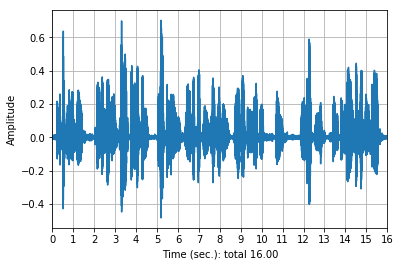

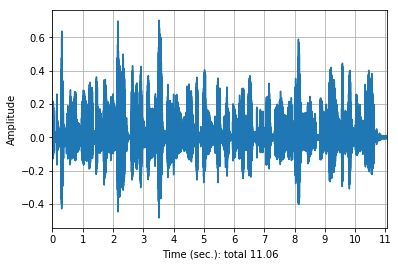

../sample_audio/nearend_Clooney5.wav


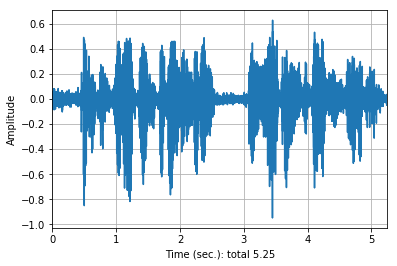

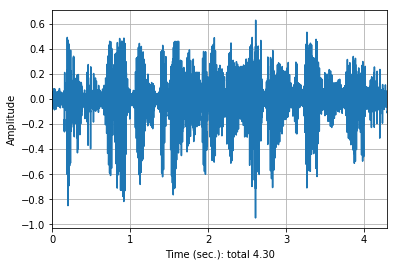

../sample_audio/farend_Sparks4.wav


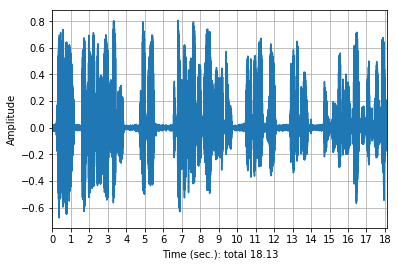

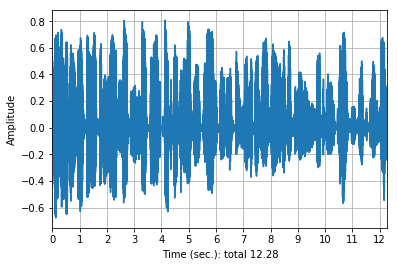

In [13]:
min_interval_sec = 0.2
min_amplitude = 0.1

for _file in wav_files:
    print(_file)
    _file_out = _file.replace('.wav', '_edit.wav')

    # load
    signal, freq = audio_editor.load_audio(_file, file_format='wav')
    # convert from second to sampling length
    min_interval = int(min_interval_sec * freq)
    # truncate audio
    signal_edit = audio_editor.truncation_function.amplitude_filter(
        signal,
        min_amplitude=min_amplitude,
        min_interval=min_interval)
    # write
    audio_editor.write_audio(_file_out,
                             audio_signal=signal_edit,
                             frequency=freq,
                             file_format='wav')
    plot_wav(signal, freq)
    plot_wav(signal_edit, freq)

In [9]:
IPython.display.Audio(_file)